# Example: Gold-plated WR-3.0 Waveguide

- Calculate the effective conductivity of gold using the Gradient Model for different surface roughnesses.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

# https://github.com/garrettj403/GradientModel
import gradientmodel as gm

# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Calculate Surface Impedance

In [3]:
# Frequency sweep for gradient model
frequency_gm = np.array([280, 300, 320, 340, 360]) * sc.giga

In [4]:
# dc conductivity
conductivity_0 = 4.1e7

In [5]:
# Gradient model: 50nm surface roughness
surface_roughness1 = 50 * sc.nano
zs_gm1, conductivity_gm1, ur_gm1 = gm.rough_properties(frequency_gm, surface_roughness1, sigma0=conductivity_0)

# Gradient model: 75nm surface roughness
surface_roughness2 = 75 * sc.nano
zs_gm2, conductivity_gm2, ur_gm2 = gm.rough_properties(frequency_gm, surface_roughness2, sigma0=conductivity_0)

# Gradient model: 100nm surface roughness
surface_roughness3 = 100 * sc.nano
zs_gm3, conductivity_gm3, ur_gm3 = gm.rough_properties(frequency_gm, surface_roughness3, sigma0=conductivity_0)

In [6]:
print("Zs (Rq=50nm):  ", zs_gm1, "\n")
print("Zs (Rq=75nm):  ", zs_gm2, "\n")
print("Zs (Rq=100nm): ", zs_gm3)

Zs (Rq=50nm):   [0.19137569+0.67783425j 0.19969187+0.71901295j 0.20786096+0.75989146j
 0.21589756+0.80049235j 0.22381408+0.8408352j ] 

Zs (Rq=75nm):   [0.21513171+0.91102026j 0.22545245+0.96768229j 0.23563912+1.02395402j
 0.2457049 +1.07986321j 0.25566102+1.13543408j] 

Zs (Rq=100nm):  [0.24143121+1.1328936j  0.25386155+1.20410322j 0.26616471+1.27482902j
 0.27835302+1.34510448j 0.29043694+1.41495888j]


In [7]:
# Polyfit for HFSS
p_zs_real_gm1 = np.polyfit(frequency_gm, zs_gm1.real, 2)
p_zs_real_gm2 = np.polyfit(frequency_gm, zs_gm2.real, 2)
p_zs_real_gm3 = np.polyfit(frequency_gm, zs_gm3.real, 2)
p_zs_imag_gm1 = np.polyfit(frequency_gm, zs_gm1.imag, 2)
p_zs_imag_gm2 = np.polyfit(frequency_gm, zs_gm2.imag, 2)
p_zs_imag_gm3 = np.polyfit(frequency_gm, zs_gm3.imag, 2)
p_ur_gm1 = np.polyfit(frequency_gm, ur_gm1, 2)
p_ur_gm2 = np.polyfit(frequency_gm, ur_gm2, 2)
p_ur_gm3 = np.polyfit(frequency_gm, ur_gm3, 2)

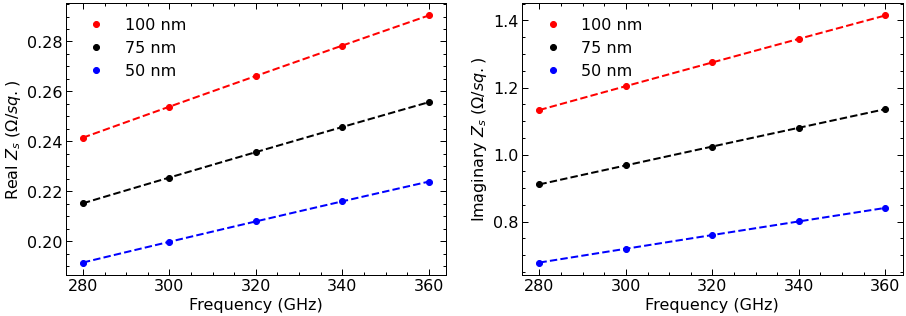

In [8]:
# Plot polyfit
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))

frequency = np.linspace(frequency_gm.min(), frequency_gm.max(), 101)

# Real component
ax0.plot(frequency_gm/1e9, zs_gm3.real, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm2.real, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm1.real, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm3, frequency), 'r--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm2, frequency), 'k--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm1, frequency), 'b--')
ax0.set_ylabel(r"Real $Z_s$ ($\Omega/sq.$)")
ax0.set_xlabel("Frequency (GHz)")
ax0.legend()

# Imaginary component
ax1.plot(frequency_gm/1e9, zs_gm3.imag, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm2.imag, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm1.imag, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm3, frequency), 'r--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm2, frequency), 'k--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm1, frequency), 'b--')
ax1.set_ylabel(r"Imaginary $Z_s$ ($\Omega/sq.$)")
ax1.set_xlabel("Frequency (GHz)")
ax1.legend()
fig.savefig("results/wr3p0-surface-impdance-300k.png", dpi=400);

In [9]:
def print_poly(poly):
    fpower_max = len(poly) - 1
    string = ""
    for i, p in enumerate(poly):
        fpower = fpower_max - i
        if fpower != 0:
            string += "{:.4e}".format(p) + " * Freq^{:d} + ".format(fpower)
        else:
            string += "{:.4e}".format(p)
    print(string)

print("Surface impedance (Z_s):")
print("\n{:.0f} nm surface roughness:".format(surface_roughness1/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm1)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm1)
print("\tur:\t\t", end=""); print_poly(p_ur_gm1)
print("\n{:.0f} nm surface roughness:".format(surface_roughness2/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm2)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm2)
print("\tur:\t\t", end=""); print_poly(p_ur_gm2)
print("\n{:.0f} nm surface roughness:".format(surface_roughness3/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm3)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm3)
print("\tur:\t\t", end=""); print_poly(p_ur_gm3)

Surface impedance (Z_s):

50 nm surface roughness:
	Real:		-1.6639e-25 * Freq^2 + 5.1190e-13 * Freq^1 + 6.1090e-02
	Imaginary:	-3.4809e-25 * Freq^2 + 2.2602e-12 * Freq^1 + 7.2277e-02
	ur:		-1.3453e-23 * Freq^2 + 5.0533e-11 * Freq^1 + 3.9473e+00

75 nm surface roughness:
	Real:		-1.5181e-25 * Freq^2 + 6.0371e-13 * Freq^1 + 5.7996e-02
	Imaginary:	-4.5444e-25 * Freq^2 + 3.0959e-12 * Freq^1 + 7.9806e-02
	ur:		-2.5115e-23 * Freq^2 + 9.6164e-11 * Freq^1 + 5.8271e+00

100 nm surface roughness:
	Real:		-1.4423e-25 * Freq^2 + 7.0482e-13 * Freq^1 + 5.5391e-02
	Imaginary:	-5.6442e-25 * Freq^2 + 3.8869e-12 * Freq^1 + 8.8822e-02
	ur:		-3.9856e-23 * Freq^2 + 1.5241e-10 * Freq^1 + 8.0532e+00


**Note:** In HFSS, select `Assign boundary > Impedance...` and then copy/paste these values into the dialog box.